<h1 style='text-align:center;'>Sales Prediction (Oasis Task-5)</h1> 

#### Removing Warnings

In [4]:
import warnings
warnings.filterwarnings('ignore')

#### Importing Libraries & Nessasary Functions

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Removing Warnings

#### Imprting the data

In [6]:
df=pd.read_csv("advertising.csv")
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [7]:
df.shape

(200, 5)

In [8]:
df=df.drop(columns=['Unnamed: 0'])
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [10]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [11]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


#### Cheking corelation Between Sales and all other Variables

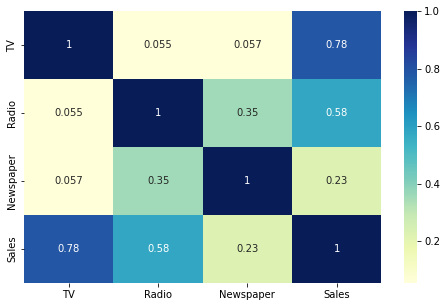

In [12]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

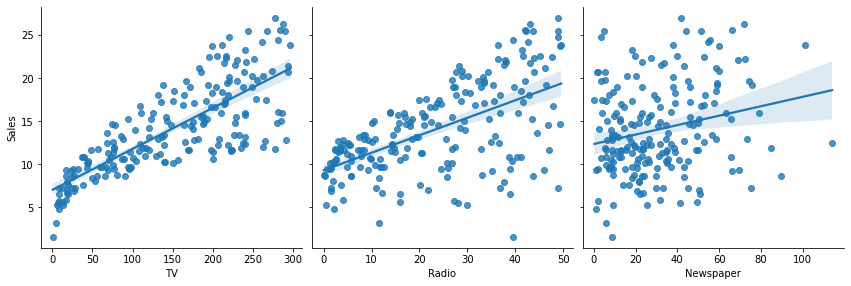

In [22]:
sns.pairplot(df,x_vars=['TV', 'Radio','Newspaper'], y_vars='Sales',size=4, aspect=1, kind='reg')
plt.show()

#### From the Regression Graph And Corelation Graph we can se that 'Sales' and 'TV' are highly correlated whereas 'Radio' and 'Sales' are Moderately Correlated and 'Newspaper' and 'Sales' are showing low correlation

#### Preprocessing Data

In [49]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [50]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

#### Using Test Train Split

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,
                                                   test_size=0.3,
                                                   random_state=100)

In [52]:
X_train.head()

,TV,Radio,Newspaper
74,213.4,24.6,13.1
3,151.5,41.3,58.5
185,205.0,45.1,19.6
26,142.9,29.3,12.6
90,134.3,4.9,9.3


#### Importing and Using Linear Regression

In [53]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [54]:
lr.fit(X_train,y_train)

LinearRegression()

In [55]:
y_pred=lr.predict(X_test)

#### Checking Our Models Predictions

In [56]:
Score= pd.DataFrame({"Actual":list(y_test), "Predicted":list(y_pred)})
Score.head()

,Actual,Predicted
0,6.6,10.621601
1,20.7,20.006253
2,17.2,16.918509
3,19.4,19.170407
4,21.8,20.949741


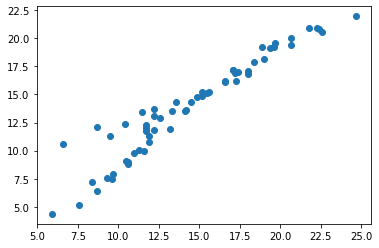

In [57]:
plt.scatter(y_test,y_pred)

In [58]:
from sklearn import metrics

MAE = metrics.mean_absolute_error(y_test,y_pred)
print("Mean Absolute error:{}".format(MAE))

Mean Absolute error:1.0638483124072018


In [59]:
MSE = metrics.mean_squared_error(y_test,y_pred)
print('Mean Squared error: {}'.format(np.sqrt(MSE)))

Mean Squared error: 1.3603977338130544


In [60]:
R2 = metrics.r2_score(y_test,y_pred)
print("R2 Score:{}".format(R2))

R2 Score:0.9058622107532247


#### Model accuracy :- 90%